https://github.com/simoneSantoni/data-viz-smm635/blob/master/tutorials/timelineCharts/_0.py

In [1]:
# load libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# read data
url = "https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv"
df = pd.read_csv(url)

df

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


In [3]:
# prepare data
# creating 2 lists containing cotinent and different year

left_label = [str(c) + ', ' + str(round(y))
              for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', ' + str(round(y))
               for c, y in zip(df.continent, df['1957'])]

# creating a list of color that condition on the difference of GDP in both years
# red when decrease, green when increase over time

klass = ['red' if (y1 - y2) < 0 else 'green'
         for y1, y2 in zip(df['1952'], df['1957'])]

In [4]:
left_label

['Africa, 1253',
 'Americas, 4079',
 'Asia, 5195',
 'Europe, 5661',
 'Oceania, 10298']

In [5]:
klass

['red', 'red', 'green', 'red', 'red']

In [6]:
# %% draw line

# custom function that defines a new line
# the starting and ending point

# wihtin p_1 and p_1 there will have 2 elements in each arguement
# 1st element = x-axis value, 2nd element = y-axis value = GDP of each continent
def newline(_p_1, _p_2, color='black'):
    
    
    _ax = plt.gca()

    # 1st element, p_1[0] and p_2[0], is setting the x-axis from left to right on the plot
    # 2nd element, p_1[1] and p_2[1], is setting the y-axis 
    
    _l = mlines.Line2D([_p_1[0], _p_2[0]], [_p_1[1], _p_2[1]],
                       color='orange' if _p_1[1] - _p_2[1] > 0 else 'black',
                       marker='o', markersize=6)
    _ax.add_line(_l)
    return _l

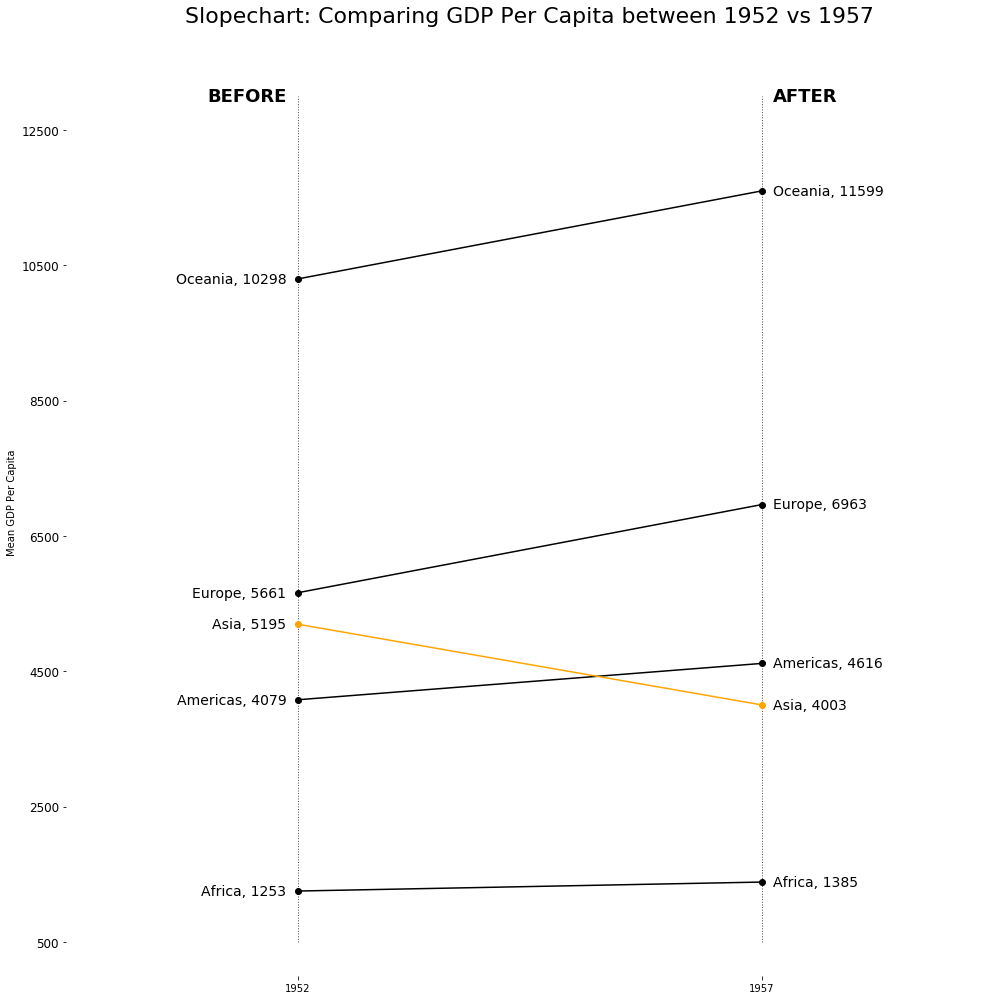

In [9]:
# create figure
fig = plt.figure(figsize=(14, 14))

# create plot
ax = fig.add_subplot(1, 1, 1)

# add lower and upper bound lines
ax.vlines(x=1, ymin=500, ymax=13000,
          color='black', alpha=0.7,
          linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000,
          color='black', alpha=0.7,
          linewidth=1, linestyles='dotted')

# add points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]),
           s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]),
           s=10, color='black', alpha=0.7)

# line segments and annotations
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1, p1], [3, p2])
    
    # 1st argue = a-axis position, 2nd argue = y-axis position, 3rd argue = the text
    ax.text(1 - 0.05, p1, c + ', ' + str(round(p1)),
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 14})
    ax.text(3 + 0.05, p2, c + ', ' + str(round(p2)),
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 14})

# 'before' and 'after' annotations
ax.text(1 - 0.05, 13000, 'BEFORE',
        horizontalalignment='right',
        verticalalignment='center',
        fontdict={'size': 18, 'weight': 700})
ax.text(3 + 0.05, 13000, 'AFTER',
        horizontalalignment='left',
        verticalalignment='center',
        fontdict={'size': 18, 'weight': 700})

# decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957",
             fontdict={'size': 22})
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)

# save figure
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), 'slope_chart.pdf'))

# show plot
plt.show()